In [178]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder



In [179]:
# 2. Load Dataset
dataset = pd.read_csv("UberDataset.csv")
print("Dataset Preview:")
print(dataset.head())
print("\nDataset Shape:", dataset.shape)

Dataset Preview:
         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit  

Dataset Shape: (1156, 7)


In [ ]:
# 3. Data Cleaning

#Remove rows where PURPOSE is 'UNKNOWN' or 'NOT_SPECIFIED'
dataset = dataset[(dataset['PURPOSE'] != "UNKNOWN") & (dataset['PURPOSE'] != "NOT_SPECIFIED")]
dataset.reset_index(drop=True, inplace=True)
print("Remaining PURPOSE categories:", dataset['PURPOSE'].unique())

#Convert START_DATE and END_DATE to datetime
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

#Drop rows with any remaining null values
dataset.dropna(inplace=True)

#Drop duplicate rows
dataset.drop_duplicates(inplace=True)

#Check the cleaned dataset
print("\nDataset shape after cleaning:", dataset.shape)
print(dataset.head())


Remaining PURPOSE categories: ['Meal/Entertain' nan 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']

Dataset shape after cleaning: (261, 7)
           START_DATE            END_DATE  CATEGORY            START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business      Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business      Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business      Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business      Fort Pierce   
5 2016-01-06 17:15:00 2016-01-06 17:19:00  Business  West Palm Beach   

              STOP  MILES          PURPOSE  
0      Fort Pierce    5.1   Meal/Entertain  
2      Fort Pierce    4.8  Errand/Supplies  
3      Fort Pierce    4.7          Meeting  
4  West Palm Beach   63.7   Customer Visit  
5  West Palm Beach    4.3   Meal/Entertain  


In [ ]:
# 4. Feature Engineering


# Extract date and hour from START_DATE
dataset['DATE'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['HOUR'] = pd.DatetimeIndex(dataset['START_DATE']).hour

# Categorize into day periods
dataset['DAY_PERIOD'] = pd.cut(dataset['HOUR'],
                               bins=[0,10,15,19,24],
                               labels=['Morning','Afternoon','Evening','Night'])

# Extract Month and Day of the Week
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
               7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
dataset['MONTH'] = dataset['MONTH'].map(month_label)

dataset['DAY'] = dataset['START_DATE'].dt.weekday
day_label = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
dataset['DAY'] = dataset['DAY'].map(day_label)

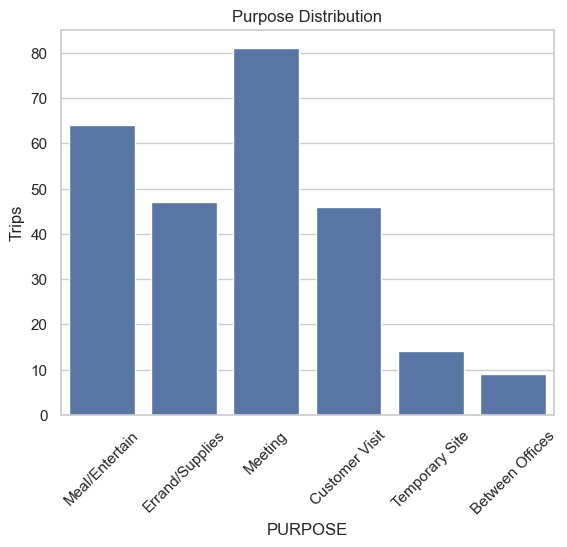

In [ ]:
# 5. Exploratory Data Analysis (EDA

# a)Purpose Distribution
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
sns.countplot(x='PURPOSE', data=dataset)
plt.xticks(rotation=45)
plt.ylabel('Trips')
plt.title("Purpose Distribution")
plt.show()

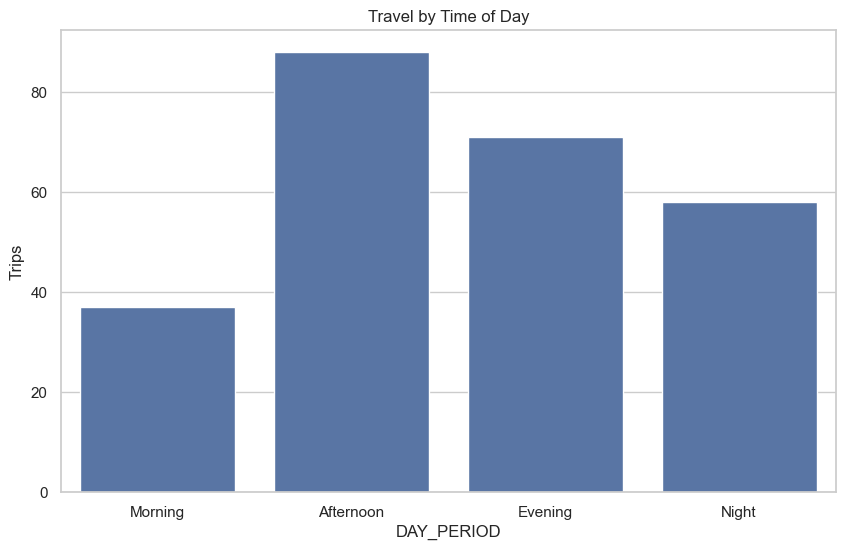

In [183]:
# b) Day Period Distribution
sns.countplot(x='DAY_PERIOD', data=dataset)
plt.ylabel('Trips')
plt.title("Travel by Time of Day")
plt.show()


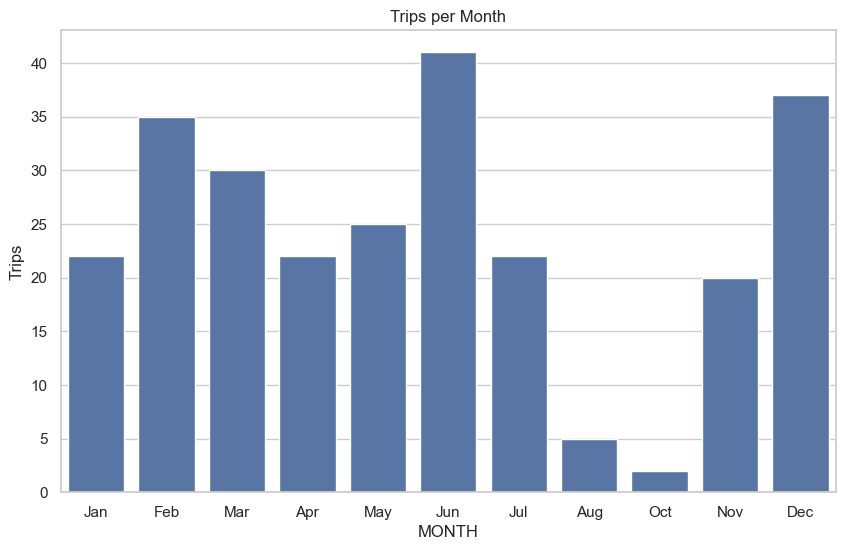

In [184]:
# c) Monthly Trend
month_counts = dataset['MONTH'].value_counts(sort=False)
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.ylabel('Trips')
plt.title("Trips per Month")
plt.show()

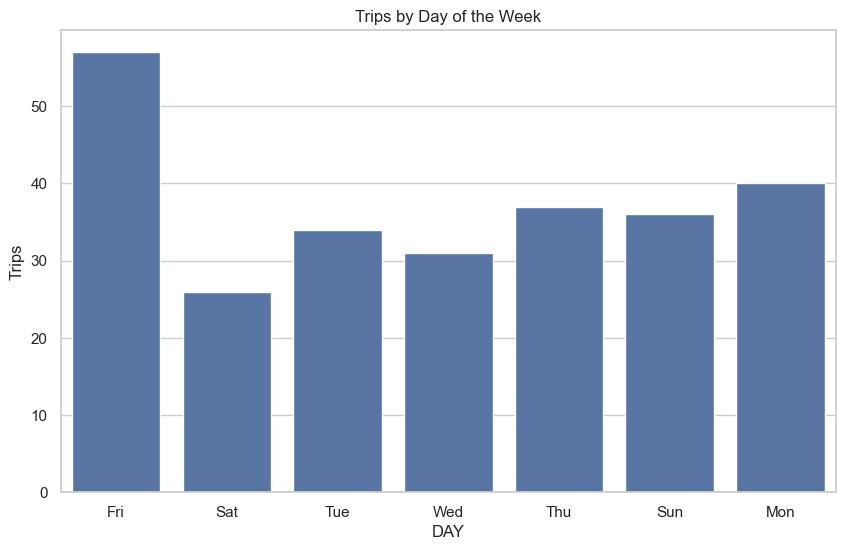

In [185]:
# d) Day of Week Trend
day_counts = dataset['DAY'].value_counts(sort=False)
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.ylabel('Trips')
plt.title("Trips by Day of the Week")
plt.show()

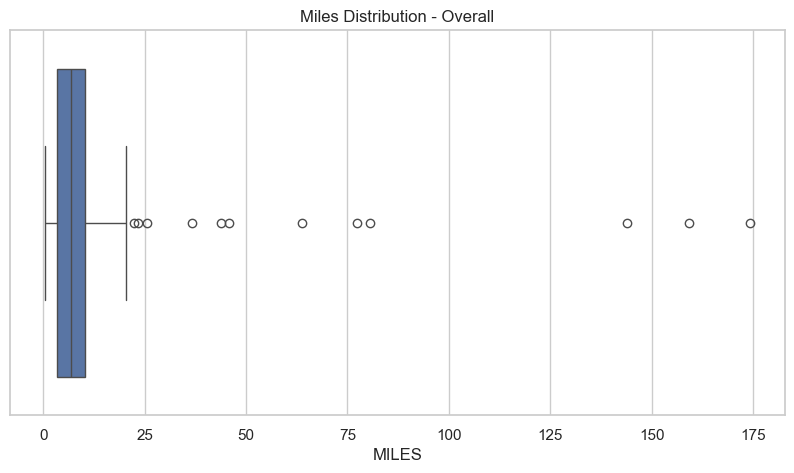

In [186]:
# e) MILES Analysis
plt.figure(figsize=(10,5))
sns.boxplot(x=dataset['MILES'])
plt.title("Miles Distribution - Overall")
plt.show()

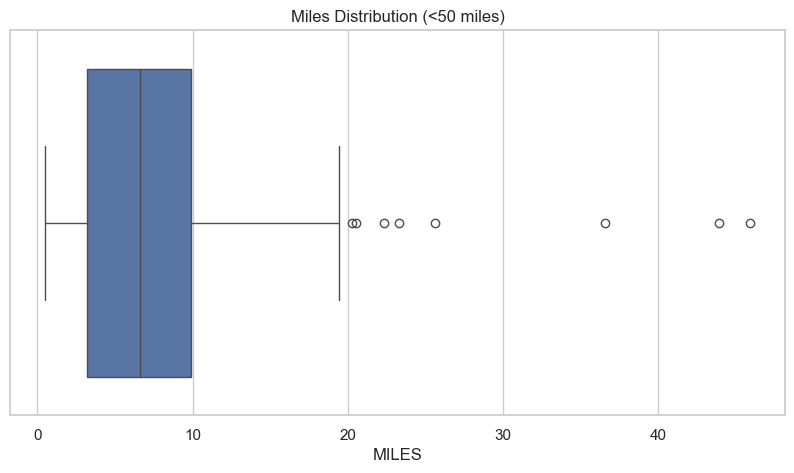

In [187]:
# f) Zoomed in (MILES < 50)
plt.figure(figsize=(10,5))
sns.boxplot(x=dataset[dataset['MILES']<50]['MILES'])
plt.title("Miles Distribution (<50 miles)")
plt.show()

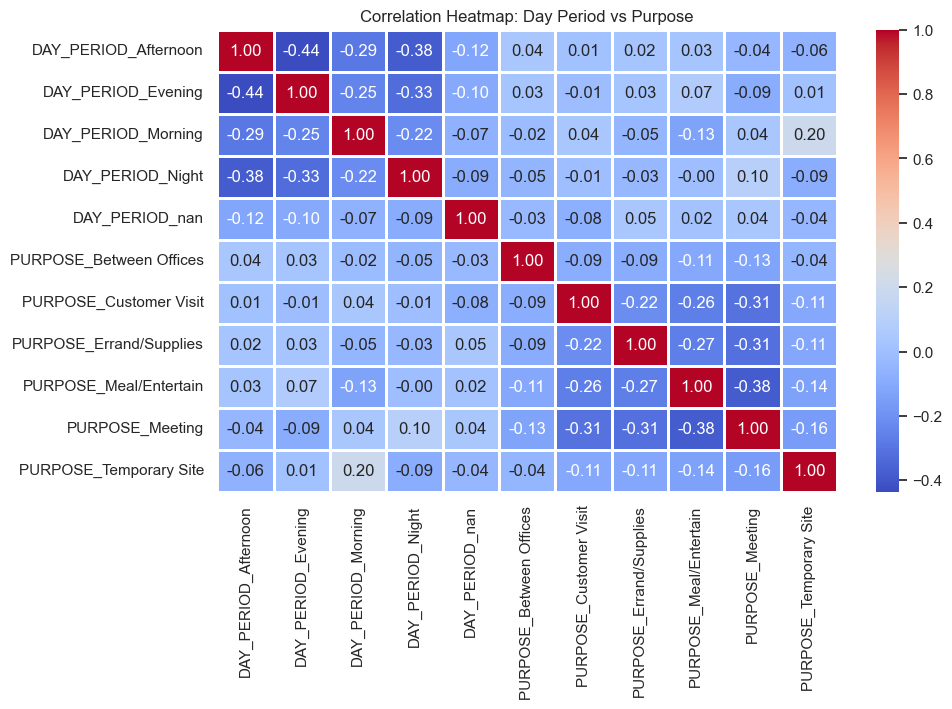

In [ ]:
# 6. Correlation Analysis

# Columns to encode
cols_to_encode = ['DAY_PERIOD', 'PURPOSE']

# One-hot encode
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[cols_to_encode]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()

# Compute and plot correlation only between DAY_PERIOD and PURPOSE
sns.heatmap(OH_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=1)
plt.title("Correlation Heatmap: Day Period vs Purpose")
plt.show()
